Presented by: Reza Saadatyar <br/>
E-mail: Reza.Saadatyar92@gmail.com

**Importing the required Libraries**

In [49]:
import matplotlib.pylab as plt
from sklearn import datasets
from Funtions import Labelling, Plot_features, Feature_extraction, Feature_selections, Data_normalization


**1. Load data**

In [15]:
method = 2
if method==1:
   data, labels = datasets.make_classification(n_samples = 1000,     # Number of samples in the dataset
                                       n_features = 5,       # Number of total features
                                       n_informative = 4,    # Number of informative features
                                       n_redundant = 0,      # Number of redundant features
                                       n_classes = 7,        # Number of classes in the dataset (binary)
                                       random_state = 1)     # Seed for reproducibility)
   print(f"{data.shape = },\n{data = },\n{labels = }")
elif method==2:
   iris = datasets.load_iris()
   data = iris.data
   labels = iris.target
   print(f"{iris.data.shape = },\n{iris.feature_names = },\n{iris.target_names = },\n{iris.data = }, \
         \n{iris.target = }")

iris.data.shape = (150, 4),
iris.feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
iris.target_names = array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
iris.data = array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6

**2. Preparing the data**

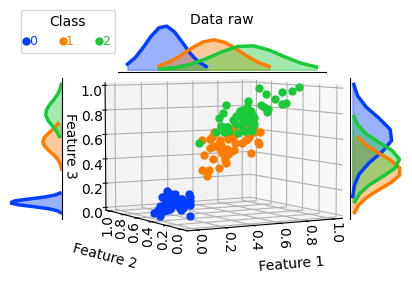

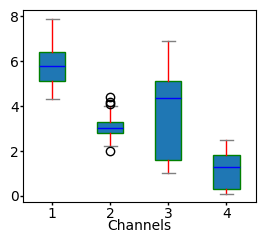

In [23]:
labels = Labelling.labelling(labels, conv_binary="off")
Plot_features.plot_features(data, labels=labels, title="Data raw", fig_size=(4, 3))
# ------------------------------------------- Boxplot ----------------------------------------------------
plt.figure(figsize=(3, 2.5))
plt.boxplot(data, boxprops=dict(color='green'), whiskerprops=dict(color='red'), medianprops=dict(color='blue'),
            capprops=dict(color='gray'), patch_artist=True)
plt.xlabel('Channels', fontsize=10, va='center')
plt.tick_params(axis='x', length=2, width=1, which='both', bottom=True, top=False, labelbottom=True, 
                labeltop=False, pad=1)
plt.tick_params(axis='y', length=2, width=1, which='both', bottom=True, top=False, labelbottom=True, 
                labeltop=False, pad=1)

**3. Feature Extraction**
- Factor Analysis (FA)
- Isometric Feature Mapping (Isomap)
- Principal component analysis (PCA) 
- Linear discriminant analysis (LDA)  
- Singular value decomposition (SVD)
- Independent component analysis (ICA) 
- T-distributed Stochastic Neighbor Embedding (T-SNE) 

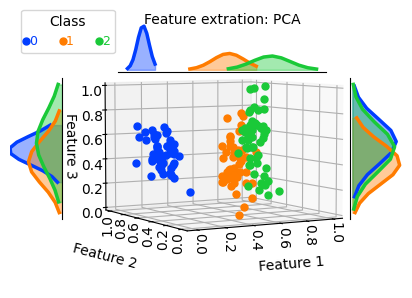

In [46]:
type_feature_extraction = "pca"       # PCA, LDA, ICA, SVD, TSNE, FA, Isomap
number_feature = 3                    # Number feature for PCA, ICA, SVD, TSNE, FA, Isomap
kernel_PCA = "linear"                 # linear, poly, rbf, sigmoid, cosine, precomputed
solver_LDA = "svd"                    # lsqr, eigen, svd
max_iter = 200                        # max_iter for ICA and FA
perplexity_TSNE = 10
n_iter_TSNE = 250                     # The range of n_iter[250, inf)
learning_rate_TSNE = "auto"
number_neighbors_Isomap = 20

output_feature = Feature_extraction.feature_extraction(data, labels, number_feature, max_iter, 
                number_neighbors_Isomap, perplexity_TSNE, n_iter_TSNE, learning_rate_TSNE,
                type_feature_extraction, kernel_PCA, solver_LDA, display_figure="on")

**4. [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)**
 - ***Filter Methods***
   - `Variance:` VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
   - Fisher_score (FS)
   - `Mutual information (MI):` Estimate mutual information for a discrete target variable. MI between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
   - `Univariate feature selection (UFS):` Univariate feature selection works by selecting the best features based on univariate statistical tests. 
 - ***Wrapper Methods***
   - Forward feature selection (FFS)
   - Backward feature selection (BFS)
   - Exhaustive Feature Selection (EFS)
   - `Recursive feature elimination (RFE)`
 - ***Embedded Methods***
   - `Random forest (RF)`
   - `L1-based feature selection (L1):` Penalized linear models with L1 norm have sparse solutions with many estimated coefficients being zero. When aiming to reduce data dimensionality for use with another classifier, they can be combined with SelectFromModel to select non-zero coefficients. Specifically, sparse estimators such as Lasso for regression, LogisticRegression, and LinearSVC for classification are useful for this purpose. With *SVMs* and *logistic-regression*, the parameter *C* controls the sparsity: the smaller *C* the fewer features selected. With Lasso, the higher the *alpha* parameter, the fewer features selected.
   - `Tree-based feature selection (TFS)`

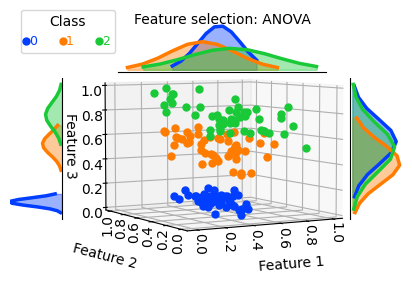

In [48]:
num_features = 3
n_neighbors_MI = 5                 # Number of neighbors to consider for mutual information calculation.
L1_Parameter = 0.1                 # Parameter value for L1 regularization.
threshold_var = 0.001              # The threshold used for variance thresholding.
type_feature_selection = "anova"   # var, anova, mi, ufs, rfe, rf, l1fs, tfs, fs, ffs, bfs
title = f"Feature selection: {type_feature_selection.upper()}"

features = Feature_selections.feature_selecions(output_feature, labels, num_features,threshold_var,
                                                n_neighbors_MI, L1_Parameter, type_feature_selection)
Plot_features.plot_features(features, labels, title, fig_size=(4, 3))

**6. Classification**
- `Data normalization:`
  - Min-Max Scaling: Normalizes or scales the data to a specified range, typically [0, 1] or [a, b].<br/>
   $X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$
  - Standardization (Z-Score): Standardizes features by removing the mean and scaling to unit variance.<br/> 
   $X_{\text{standardized}} = \frac{X - \mu}{\sigma}$
  - Mean: Similar to standardization but scales data to have a mean of 0 and a range between -1 and 1.<br/>
   $X_{\text{normalized}} = \frac{X - \mu}{X_{\text{max}} - X_{\text{min}}}$

 - `Logistic Regression`

In [59]:
import numpy as np
from sklearn import model_selection, metrics

# ========================================== classification ==============================================
def classification(model, data, labels, k_fold=5, method="minmax", normalize_active="off", 
                     type_class="LR"):
   # ------------------------------------------- K_fold --------------------------------------------------
   cv = model_selection.StratifiedKFold(n_splits=k_fold)     
   # -----------------------------------------------------------------------------------------------------
   accuracy_tr, f1_tr, precision_tr, recall_tr = [], [], [], []
   accuracy_te, f1_te, precision_te, recall_te = [], [], [], []
   
   for j, (train, test) in enumerate(cv.split(data, labels)):  
      # ----------------------------------------- Split data ---------------------------------------------
      data_train = data[train]
      data_test = data[test]
      label_train = labels[train]
      label_test = labels[test]
      # ------------ Data normalization (# method 1: MinMaxScaler, method 2: StandardScaler) -------------
      if normalize_active == "on": 
          data_train, data_test = Data_normalization.data_normalization(data_train, data_test, method)
      # ------------- Training Network (Calculate accuracy, F1 score, precision, recall) -----------------
      model.fit(data_train, label_train)              # Fit i.e., Training
      label_predict_train = model.predict(data_train)
      
      accuracy_tr.append(metrics.accuracy_score(label_train, label_predict_train))
      f1_tr.append(metrics.f1_score(label_train, label_predict_train, average='weighted')) 
      precision_tr.append(metrics.precision_score(label_train, label_predict_train, average='weighted'))
      recall_tr.append(metrics.recall_score(label_train, label_predict_train, average='weighted'))
      # -------------------- Test (Calculate accuracy, F1 score, precision, recall -----------------------
      label_predict_test = model.predict(data_test)
      accuracy_te.append(metrics.accuracy_score(label_test, label_predict_test))
      f1_te.append(metrics.f1_score(label_test, label_predict_test, average='weighted'))
      precision_te.append(metrics.precision_score(label_test, label_predict_test, average='weighted'))
      recall_te.append(metrics.recall_score(label_test, label_predict_test, average='weighted')) 
      # cr_test = metrics.classification_report(label_test, label_predict_test, labels=np.unique(label_test))

   return accuracy_tr, accuracy_te, f1_tr, f1_te, precision_tr, precision_te, recall_tr, recall_te, type_class

In [64]:
from sklearn import linear_model
# ------------------------------------------- Logistic Regression ----------------------------------------
k_fold = 5
max_iter = 1000            # Max_iter for LR
solver_LR = 'lbfgs'        # Solver for LR lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga; 
method = "minmax"
mod = linear_model.LogisticRegression(C=1, max_iter=max_iter, solver=solver_LR, penalty='l2', verbose=0)

output = classification(mod, data, labels, k_fold, method, normalize_active="on", type_class="LR")

# accuracy_tr.append(output[0]), accuracy_te.append(output[1]), f1_tr.append(output[2]), f1_te.append(output[3]), 
# precision_tr.append(output[4]), precision_te.append(output[5]), recall_tr.append(output[6]), recall_te.append(output[7]),
# type_method.append(output[8]),

In [69]:
output[8]

'LR'

In [ ]:
output = classification(mod, data, labels, fig, axs, k_fold, normalize_active, method, display_fold_classification, display_classification, display_normalize_classification, display_Roc_classes, display_all_kfold, display_Roc_classification, fig_size_Roc, fig_size_classification, display_optimal_k, type_class="LR")


In [50]:
import importlib
importlib.reload(Data_normalization)

<module 'Funtions.Data_normalization' from 'd:\\Machine-Learning-in-Python\\Code\\Funtions\\Data_normalization.py'>